# Sharpen
Try to sharpen images

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/M_DV_V2022

Mounted at /content/gdrive
/content/gdrive/MyDrive/M_DV_V2022


### Imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, Flatten, \
                         UpSampling2D, Conv2DTranspose, MaxPooling2D, \
                         Dropout, Concatenate

### Load data

In [3]:
X = np.load("sharpen/X_data.npy")
y = np.load("sharpen/y_data.npy")

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
snitt = X_train.mean()
var = X_train.var()

snitt_y = y_train.mean()
var_y = y_train.var()

#X_train = (X_train - snitt) / var
#X_test = (X_test - snitt) / var

#y_train = (y_train - snitt_y) / var_y
#y_test = (y_test - snitt_y) / var_y

### Show data

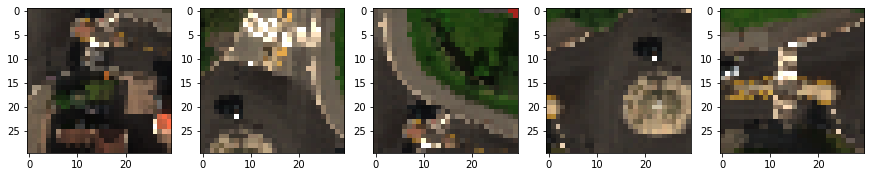

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (15,15))

indx = np.random.randint(0,high=X.shape[0],size=5)
for i,axis in enumerate(ax):
  axis.imshow(X[indx[i]])
plt.show()



### Make model

In [78]:
inputs = Input(shape=(30,30,3))
x = Conv2D(32, kernel_size=3, activation='relu', padding='valid')(inputs)
x = MaxPooling2D(2)(x)

x = Conv2DTranspose(32, kernel_size=3, activation='relu', padding='same')(x)
up = UpSampling2D(5)(x)


x1 = Conv2D(32, kernel_size=3, strides=(2,1), activation='relu', padding="same")(up)
y1 = Conv2D(32, kernel_size=3, strides=(1,2), activation='relu', padding="same")(up)
x1 = Conv2DTranspose(32, kernel_size=3, strides=(2,1), activation='relu', padding="same")(x1)
y1 = Conv2DTranspose(32, kernel_size=3, strides=(1,2), activation='relu', padding="same")(y1)
x = Concatenate()([x1,y1])


outputs = Conv2D(3, kernel_size=3, activation='sigmoid', padding='same')(x)

model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='adam',
              loss='mse')
model2.summary()


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_42 (InputLayer)          [(None, 30, 30, 3)]  0           []                               
                                                                                                  
 conv2d_130 (Conv2D)            (None, 28, 28, 32)   896         ['input_42[0][0]']               
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 14, 14, 32)  0           ['conv2d_130[0][0]']             
 )                                                                                                
                                                                                                  
 conv2d_transpose_109 (Conv2DTr  (None, 14, 14, 32)  9248        ['max_pooling2d_11[0][0]']

In [83]:
model = Sequential()

model.add(Input(shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                     padding='valid'))
model.add(MaxPooling2D(2))
model.add(Conv2DTranspose(32, kernel_size=3, activation='relu',
                padding='same'))
model.add(UpSampling2D(5))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))

model.add(Conv2D(3, kernel_size=3, activation='sigmoid',
                 padding='same'))

#model.add(Conv2DTranspose(32, kernel_size=3, padding="same"))
#model.add(UpSampling2D(3))

model.summary()
model.compile(optimizer='adam',
              loss='mse')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_134 (Conv2D)         (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_112 (Conv2  (None, 14, 14, 32)       9248      
 DTranspose)                                                     
                                                                 
 up_sampling2d_39 (UpSamplin  (None, 70, 70, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_135 (Conv2D)         (None, 70, 70, 32)        9248      
                                                     

## Train model

In [79]:
history = model2.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=200, batch_size=10, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 105ms/step - loss: 0.0938 - val_loss: 0.0858
Epoch 2/200
4/4 [==============================] - 0s 45ms/step - loss: 0.0746 - val_loss: 0.0597
Epoch 3/200
4/4 [==============================] - 0s 44ms/step - loss: 0.0549 - val_loss: 0.0600
Epoch 4/200
4/4 [==============================] - 0s 45ms/step - loss: 0.0578 - val_loss: 0.0544
Epoch 5/200
4/4 [==============================] - 0s 44ms/step - loss: 0.0513 - val_loss: 0.0517
Epoch 6/200
4/4 [==============================] - 0s 42ms/step - loss: 0.0488 - val_loss: 0.0470
Epoch 7/200
4/4 [==============================] - 0s 41ms/step - loss: 0.0427 - val_loss: 0.0411
Epoch 8/200
4/4 [==============================] - 0s 41ms/step - loss: 0.0369 - val_loss: 0.0319
Epoch 9/200
4/4 [==============================] - 0s 42ms/step - loss: 0.0276 - val_loss: 0.0235
Epoch 10/200
4/4 [==============================] - 0s 44ms/step - loss: 0.0201 - val_loss: 0.0177
Epoch 11/200
4/4 [

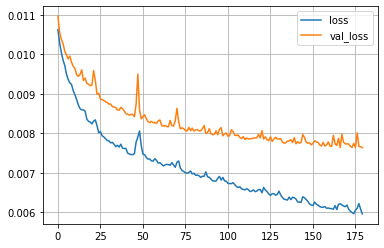

In [80]:
plt.plot(history.history['loss'][20:], label="loss")
plt.plot(history.history['val_loss'][20:], label="val_loss")
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Predicted')

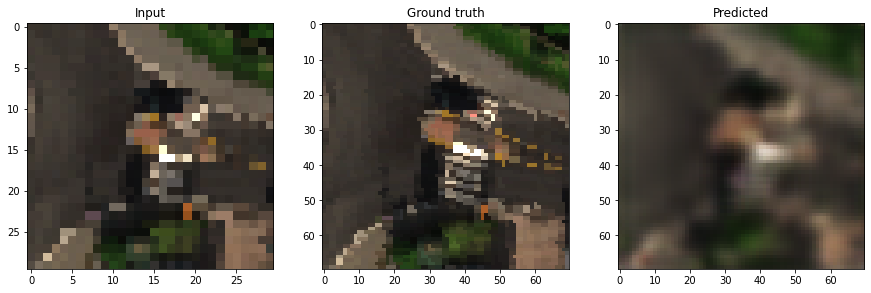

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize = (15,15))
ax1.imshow(X_test[2:3][0][:,:,:])
ax1.set_title("Input")
ax2.imshow(y_test[2:3][0][:,:,:])
ax2.set_title("Ground truth")
ax3.imshow(model2.predict(X_test[2:3])[0][:,:,:])
ax3.set_title("Predicted")